Integration

In [1]:
from utility.data_loader import load_parquet_data
from utility.data_transformer import transform_data
import utility.wt_comparision as wt_comparision
from pathlib import Path
import optimizers.basic as basic
import optimizers.newtons_method as newtons_method
import optimizers.cg_optimizer as cg_optimizer
import optimizers.qp_solver as qp_solver
from optimizers.ipm_optimizer import solve_with_ipm, plot_ipm_convergence


In [2]:
# Load the data
parquet_file_path = Path().absolute().parent / 'data' / 'breuninger_user_product_event_counts_000000000000'
my_data_df = load_parquet_data(parquet_file_path, engine='pyarrow')

# Transform the data
data_for_optimization = transform_data(my_data_df, lambda_1=1.0, lambda_2=0.1)    


Projected Newton's Method Execution (K=5 Features)
Goal: Minimize g(w) = 1/2 w^T Q w - c^T w, subject to Simplex Constraints
--- Initial Setup ---
  > Initial Objective (Min g(w)): -85066.701720
  > Initial Weights: add_to_cart: 0.2000, add_to_wishlist: 0.2000, product_view: 0.2000, purchase: 0.2000, view_cart: 0.2000
--- Iteration 01 ---
  > Current Objective (Min g(w)): -314199.072110
  > Gradient Norm: 321957.772176
  > Step Change (|w_next - w|): 0.894427
  > Current Weights: add_to_cart: 0.0000, add_to_wishlist: 0.0000, product_view: 1.0000, purchase: 0.0000, view_cart: 0.0000
--- Iteration 02 ---
  > Current Objective (Min g(w)): -314199.072110
  > Gradient Norm: 321955.857242
  > Step Change (|w_next - w|): 0.000000
  > Current Weights: add_to_cart: 0.0000, add_to_wishlist: 0.0000, product_view: 1.0000, purchase: 0.0000, view_cart: 0.0000

[INFO] CONVERGENCE: Step change is below tolerance.

[INFO] Total Iterations: 2
[INFO] Time elapsed: 0.0002 seconds

[INFO] Plotting converg

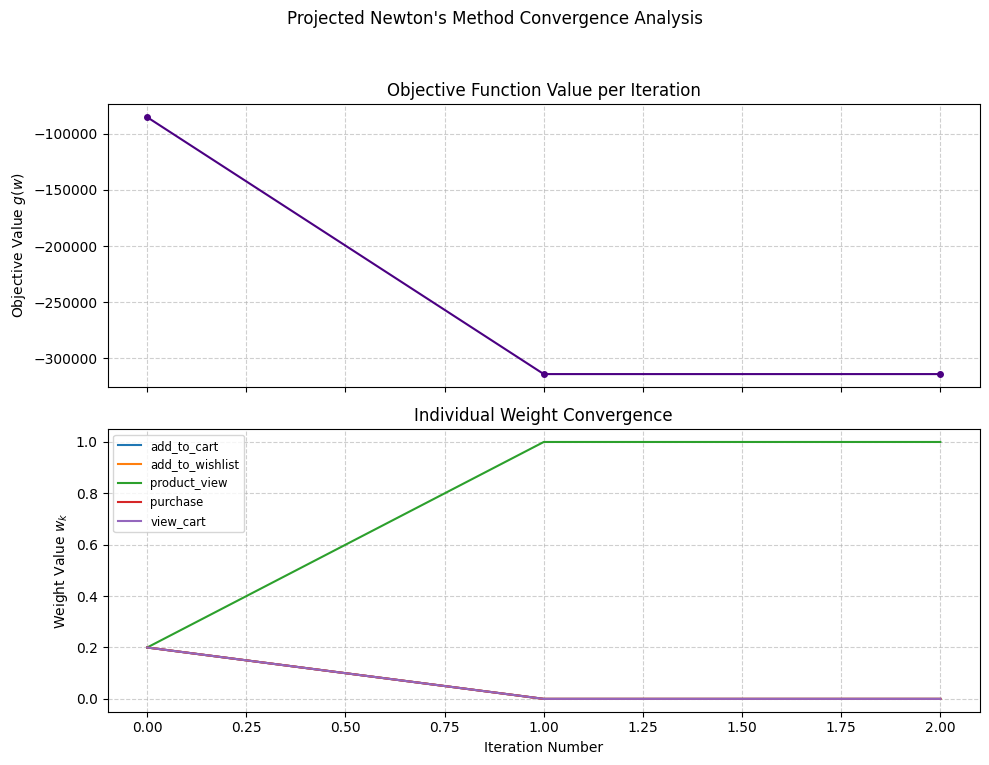

In [3]:
# Newton's Method Optimization
result_newtons_method=newtons_method.solve_with_projected_newtons_method(data_for_optimization['Q_solver'], data_for_optimization['c'], data_for_optimization['weight_names'] )
if 'history' in result_newtons_method and result_newtons_method['history']:
        print("\n[INFO] Plotting convergence history...")
        newtons_method.plot_convergence(result_newtons_method['history'], data_for_optimization['weight_names'])



Projected Conjugate Gradient Method Execution (K=5 Features)
Goal: Minimize g(w) = 1/2 w^T Q w - c^T w, subject to Simplex Constraints
--- Initial Setup ---
  > Initial Objective (Min g(w)): -85066.701720
  > Initial Weights: add_to_cart: 0.2000, add_to_wishlist: 0.2000, product_view: 0.2000, purchase: 0.2000, view_cart: 0.2000
--- Iteration 01 ---
  > Current Objective: -85066.701720
  > Step Change: 0.894427
  > Current Weights: add_to_cart: 0.0000, add_to_wishlist: 0.0000, product_view: 1.0000, purchase: 0.0000, view_cart: 0.0000
--- Iteration 02 ---
  > Current Objective: -314199.072110
  > Step Change: 0
  > Current Weights: add_to_cart: 0.0000, add_to_wishlist: 0.0000, product_view: 1.0000, purchase: 0.0000, view_cart: 0.0000

[INFO] CONVERGENCE: Step change (0.00e+00) is below tolerance (1.00e-07).

[INFO] Total Iterations: 3
[INFO] Time elapsed: 0.0002 seconds
[INFO] Final Sum of Weights: 1.0

[INFO] Plotting convergence history...


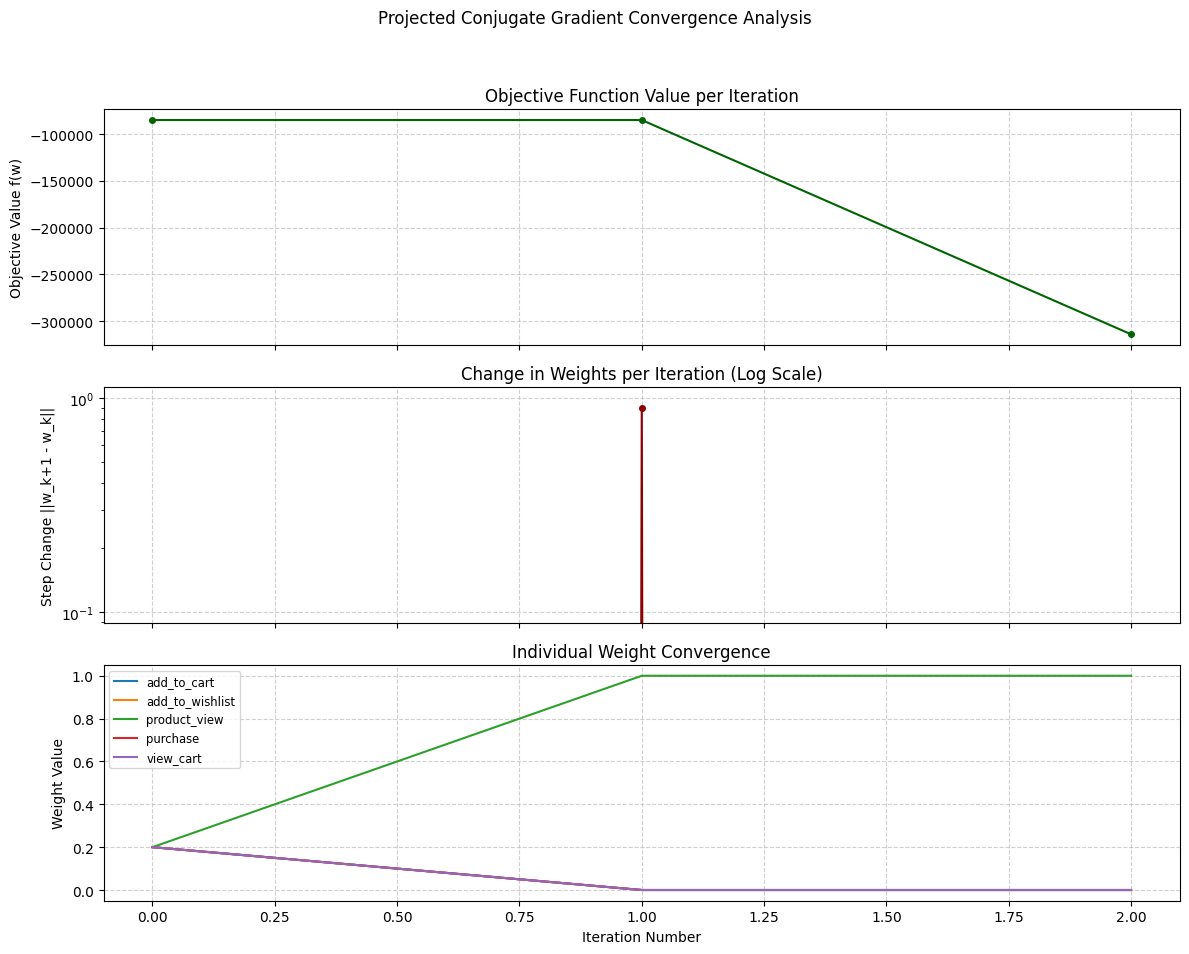

In [4]:
# Conjugate Gradient Method Optimization
result_cg_method=cg_optimizer.solve_with_conjugate_gradient(data_for_optimization['Q_solver'], data_for_optimization['c'], data_for_optimization['weight_names'] )
if 'history' in result_cg_method and result_cg_method['history']:
        print("\n[INFO] Plotting convergence history...")
        cg_optimizer.plot_cg_convergence(result_cg_method['history'], data_for_optimization['weight_names'])  


Primal-Dual Interior Point Method Execution (K=5 Features)
Goal: Minimize g(w) = 1/2 w^T Q w - c^T w, subject to Simplex Constraints
--- Initial Setup ---
  > Initial Objective (Min g(w)): -85066.701720
  > Initial Weights: add_to_cart: 0.2000, add_to_wishlist: 0.2000, product_view: 0.2000, purchase: 0.2000, view_cart: 0.2000
--- Iteration 01 ---
  > Current Objective: -85066.701720
  > Duality Gap: 0.2
  > Current Weights: add_to_cart: 0.2000, add_to_wishlist: 0.2000, product_view: 0.2000, purchase: 0.2000, view_cart: 0.2000
--- Iteration 02 ---
  > Current Objective: -139194.307864
  > Duality Gap: 0.155468
  > Current Weights: add_to_cart: 0.1500, add_to_wishlist: 0.1410, product_view: 0.3790, purchase: 0.1199, view_cart: 0.2101
--- Iteration 03 ---
  > Current Objective: -239672.325941
  > Duality Gap: 0.0851095
  > Current Weights: add_to_cart: 0.0456, add_to_wishlist: 0.0342, product_view: 0.7204, purchase: 0.0184, view_cart: 0.1813
--- Iteration 04 ---
  > Current Objective: -2

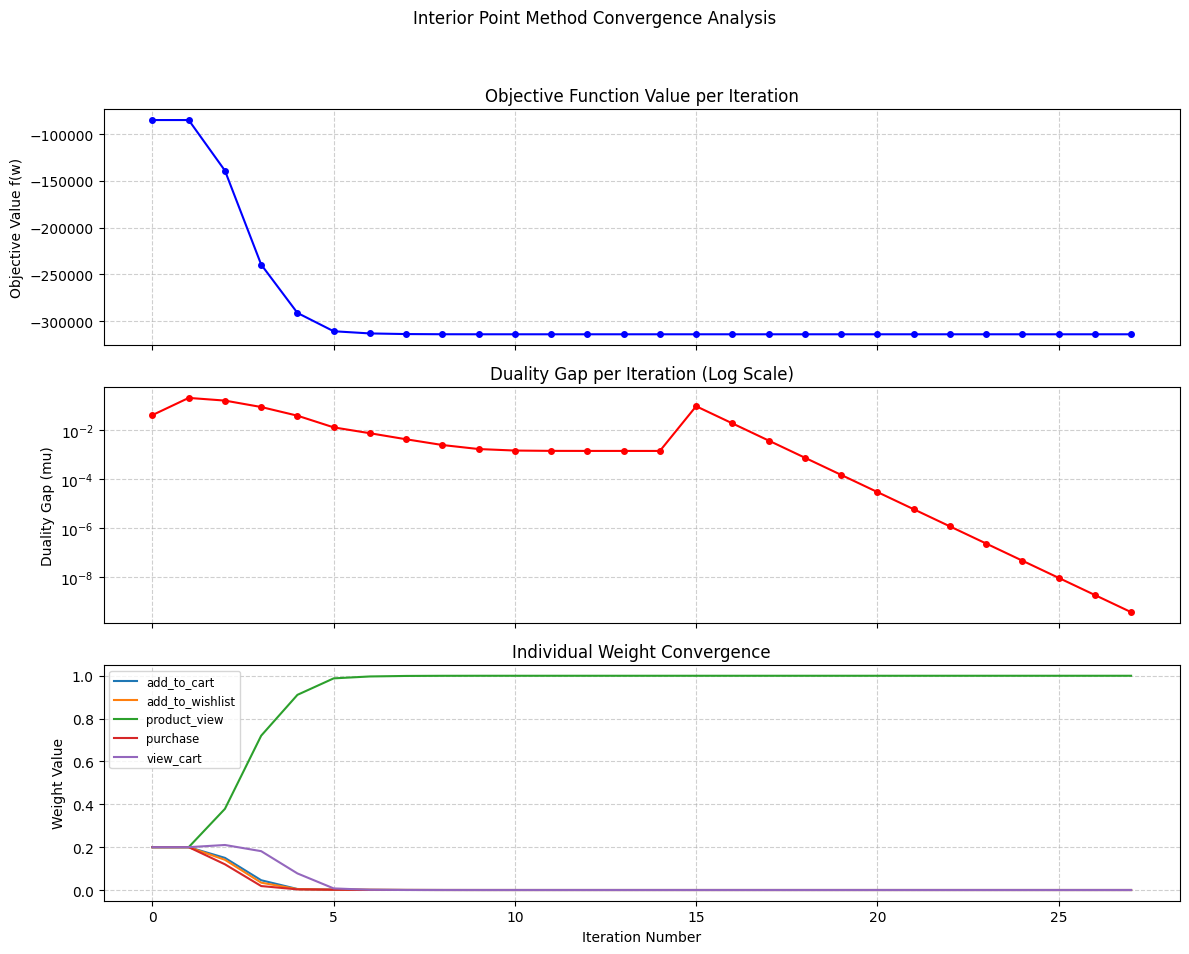

In [5]:
# Solve with IPM Solver
res_ipm = solve_with_ipm(data_for_optimization['Q_solver'], data_for_optimization['c'], data_for_optimization['weight_names'] )

if 'history' in res_ipm and res_ipm['history']:
    print("\n[INFO] Plotting IPM convergence history...")
    plot_ipm_convergence(res_ipm['history'], data_for_optimization['weight_names']) 

In [6]:
# Quadratic Programming Solver Optimization
qp_results_hirarchy_constrained = qp_solver.solve_quadratic_programming(data_for_optimization, constraints_type='hierarchy')
# Simplex Constrained QP Solver Optimization
qp_results_simple_constrained = qp_solver.solve_quadratic_programming(data_for_optimization, constraints_type='simple')



Applying Logical Hierarchy Constraint:
  Constraint: w['purchase'] >= w['add_to_cart']
  Constraint: w['add_to_cart'] >= w['product_view']

--- Optimization Results ---
Solver Status: optimal
Maximized Objective Value (f(w)): 114047.1513

Optimal Weight Vector (w*):
             Event  Optimal_Weight
0      add_to_cart    3.333333e-01
1  add_to_wishlist   -1.214604e-23
2     product_view    3.333333e-01
3         purchase    3.333333e-01
4        view_cart    1.444529e-24

Applying Simple Constraints (Normalization + Non-Negativity only).

--- Optimization Results ---
Solver Status: optimal
Maximized Objective Value (f(w)): 314199.0721

Optimal Weight Vector (w*):
             Event  Optimal_Weight
0      add_to_cart    5.083119e-24
1  add_to_wishlist    5.083156e-24
2     product_view    1.000000e+00
3         purchase    5.083113e-24
4        view_cart    8.461505e-23


In [7]:
# Heuristic Weights Calculation Method
heuristic_results = basic.calculate_heuristic_weights(data_for_optimization)

# Log-sum Weights Calculation Method
log_sum_results = basic.calculate_log_sum_weights(data_for_optimization)



Visualization



--- Generating Final Score Comparison ---


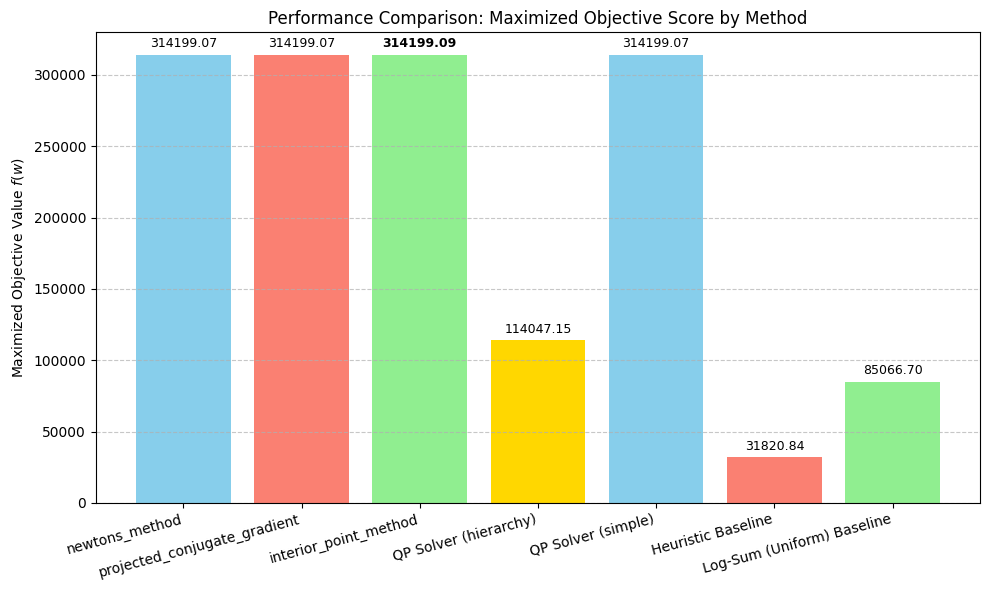

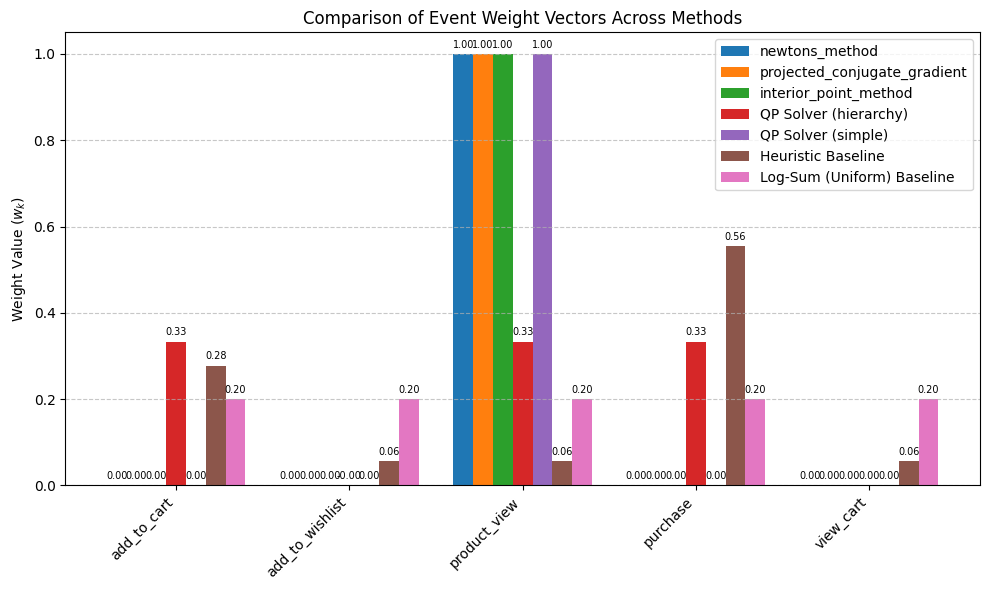


--- Best Optimization Method Found ---
Method: interior_point_method
Max Objective Score (f(w)): 314199.0893

Weights for the Best Method:
                       Weight
Event                        
add_to_cart      2.559652e-16
add_to_wishlist  2.546883e-16
product_view     1.000000e+00
purchase         2.445688e-16
view_cart        2.999822e-16


In [8]:
# List to collect all weight vectors for comparison
all_weight_results = []
all_weight_results.append({**result_newtons_method, 'weight_names': data_for_optimization['weight_names']})
all_weight_results.append({**result_cg_method, 'weight_names': data_for_optimization['weight_names']})
all_weight_results.append({**res_ipm, 'weight_names': data_for_optimization['weight_names']})

all_weight_results.append({**qp_results_hirarchy_constrained, 'weight_names': data_for_optimization['weight_names']})
all_weight_results.append({**qp_results_simple_constrained, 'weight_names': data_for_optimization['weight_names']})
all_weight_results.append({**heuristic_results, 'weight_names': data_for_optimization['weight_names']})
all_weight_results.append({**log_sum_results, 'weight_names': data_for_optimization['weight_names']})


#Visualize the Final Scores =
print("\n\n--- Generating Final Score Comparison ---")
wt_comparision.visualize(data_for_optimization,all_weight_results)